['Favorite', 'Favorite', 'Favorite', 'Favorite', 'Favorite', 'Favorite', 'Favorite', 'Favorite', 'Favorite', 'Favorite', 'Favorite', 'Favorite', 'Favorite', 'NotFavorite', 'NotFavorite', 'NotFavorite', 'NotFavorite', 'NotFavorite', 'NotFavorite', 'NotFavorite', 'NotFavorite', 'NotFavorite', 'NotFavorite', 'NotFavorite', 'NotFavorite']


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


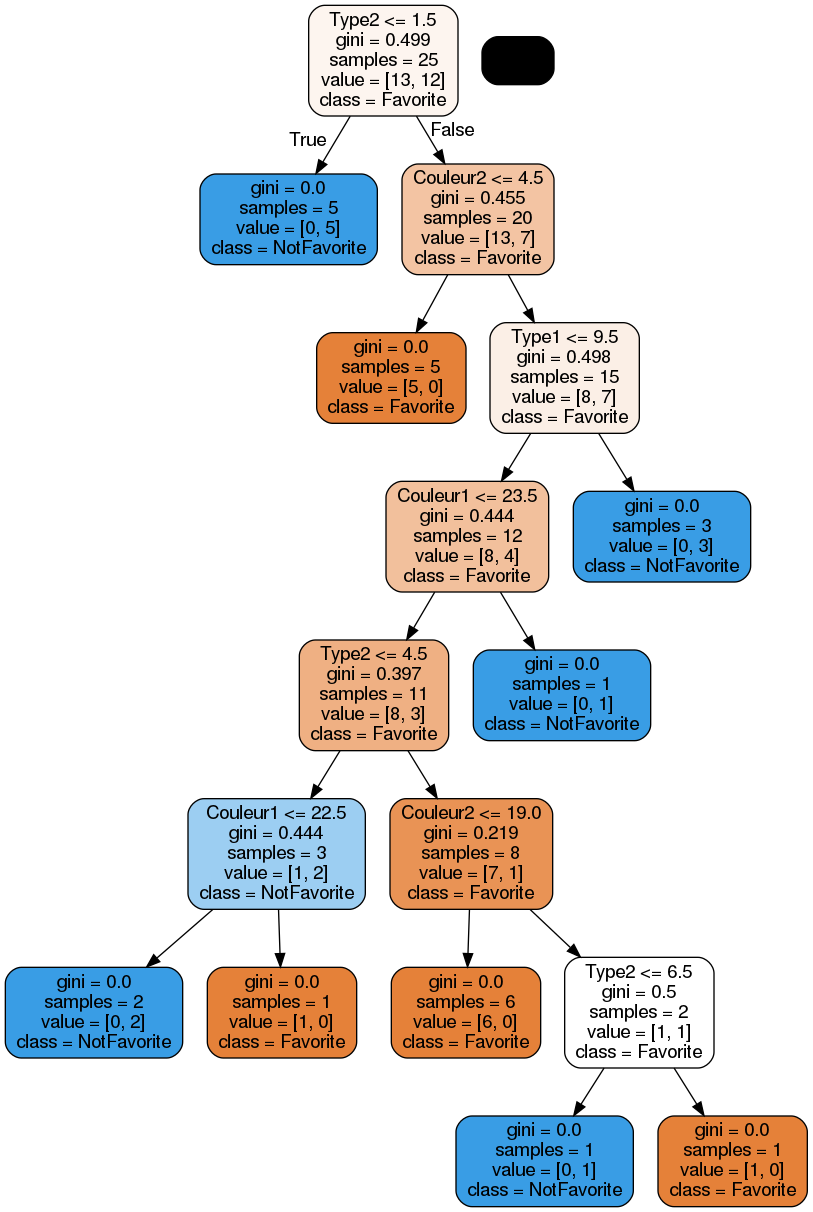

KeyError: 14

In [13]:
import math
import numpy as np
from sklearn.cluster import KMeans
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display
import random

def Type2CaseNull(i):
    if(dfFavorite .iloc[i]['Type2'] != None): return dfFavorite .iloc[i]['Type2']
    else: return 'None'

dfFavorite = pd.read_json('user0.json')
data = [[dfFavorite .iloc[i]['Type1'], Type2CaseNull(i), dfFavorite .iloc[i]['Couleur1'], dfFavorite .iloc[i]['Couleur2']] for i in range(len(dfFavorite ))]

result = [ dfFavorite['Favorite'].loc[dfFavorite['Name'] == pokemonFavori].values[0] for pokemonFavori in dfFavorite.iloc[:]['Name'] ]
print(result)
#creating dataframes
dataframe = pd.DataFrame(data, columns=['Type1', 'Type2', 'Couleur1', 'Couleur2'])
resultframe = pd.DataFrame(result, columns=['Favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['Type1'] = le1.fit_transform(dataframe['Type1'])

le2 = LabelEncoder()
dataframe['Type2'] = le2.fit_transform(dataframe['Type2'])

le3 = LabelEncoder()
dataframe['Couleur1'] = le3.fit_transform(dataframe['Couleur1'])

le4 = LabelEncoder()
dataframe['Couleur2'] = le4.fit_transform(dataframe['Couleur2'])

le5 = LabelEncoder()
resultframe['Favorite'] = le5.fit_transform(resultframe['Favorite'])

#Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe, resultframe)

dot_data = tree.export_graphviz(dtc, out_file=None,
        feature_names=dataframe.columns,
        filled=True, rounded=True, 
        class_names =
        le5.inverse_transform(
        resultframe.Favorite.unique())
        )
graph = graphviz.Source(dot_data)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

recommandation = [] #on initialise une liste de tableaux recommandés
non_recommandation=[] #on initialise une liste de tableaux non-recommandés

dfPokemon = pd.read_json('pokemon3.json')

while len(recommandation)<10:
    tab = random.choice(dfPokemon)
    print(tab)
    print(le1.transform([tab["Type1"]])[0])
    if tab not in dfFavorite['Name']: #l'algo de prédiction plante si on lui présente un tableau dont l'auteur est n'a pas été vu par l'utilisateur.
        continue
    prediction = dtc.predict([ #on réalise une prédiction pour savoir si le tableau plaira à l'utilisateur
            [le1.transform([tab["Type1"]])[0], le2.transform([tab["Type2"]])[0],le3.transform([tab["Couleur1"]])[0],le4.transform([tab["Couleur2"]])[0]]])
    if prediction == "Favorite": 
        recommandation.append(tab)
    else:
        non_recommandation.append(tab)

print(recommandation)
